## heapq
#### 非极值，为堆排序最值

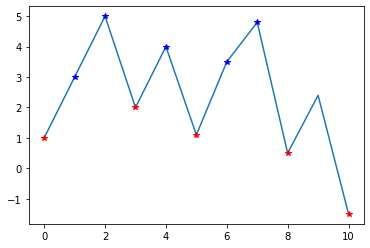

In [19]:
import numpy as np
import heapq
from matplotlib import pyplot as plt
numbers = [1, 3, 5, 2, 4, 1.1, 3.5, 4.8, 0.5, 2.4, -1.5]
plt.plot(numbers)
for index,value in heapq.nsmallest(5,enumerate(numbers), key=lambda x: x[1]):
    plt.plot(index,value,'r*')
for index,value in heapq.nlargest(5,enumerate(numbers), key=lambda x: x[1]):
    plt.plot(index,value,'b*')
plt.show()

[detail](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy-signal-find-peaks)

x: 带有峰值的信号序列

height: 低于指定height的信号都不考虑

threshold: 其与相邻样本的垂直距离

distance: 相邻峰之间的最小水平距离, 先移除较小的峰，直到所有剩余峰的条件都满足为止。

prominence: 个人理解是突起程度，详见peak_prominences

width: 波峰的宽度，详见peak_widths

plateau_size: 保证峰对应的平顶数目大于给定值

### prominence定义峰的最小有效高度

{'prominences': array([5., 6., 5., 6.]), 'left_bases': array([ 8, 10, 17, 17], dtype=int64), 'right_bases': array([10, 17, 28, 30], dtype=int64)}


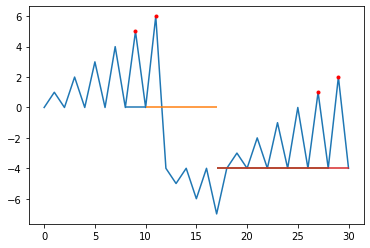

In [47]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
signal=[0,1,0,2,0,3,0,4,0,5,0,6,-4,-5,-4,-6,-4,-7,-4,-3,-4,-2,-4,-1,-4,0,-4,1,-4,2,-4]
signal=np.array(signal)
peaks, properties = find_peaks(signal, prominence=5)#,wlen=20
plt.plot(signal)
plt.plot(np.arange(len(signal))[peaks],signal[peaks],'r.')

print(properties)
plt.hlines(y=signal[peaks]-properties['prominences'], xmin=np.arange(len(signal))[properties['left_bases']],
           xmax=np.arange(len(signal))[properties['right_bases']], color =['C'+str(i) for i in range(len(peaks))])
#plt.plot(np.arange(len(signal))[properties['left_bases']],signal[properties['left_bases']])
plt.show()


### height设定波峰峰值的最小值

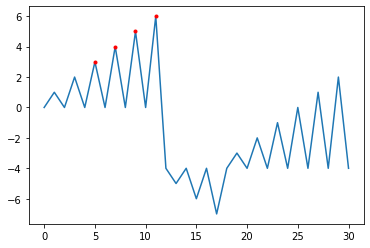

In [9]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
signal=[0,1,0,2,0,3,0,4,0,5,0,6,-4,-5,-4,-6,-4,-7,-4,-3,-4,-2,-4,-1,-4,0,-4,1,-4,2,-4]
signal=np.array(signal)
peaks, properties = find_peaks(signal, height=3)
plt.plot(signal)
plt.plot(np.arange(len(signal))[peaks],signal[peaks],'r.')
plt.show()

### distance对峰值抽样，指定抽样率

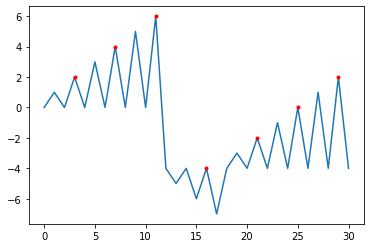

In [17]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
signal=[0,1,0,2,0,3,0,4,0,5,0,6,-4,-5,-4,-6,-4,-7,-4,-3,-4,-2,-4,-1,-4,0,-4,1,-4,2,-4]
signal=np.array(signal)
peaks, properties = find_peaks(signal,distance=3)
plt.plot(signal)
plt.plot(np.arange(len(signal))[peaks],signal[peaks],'r.')
plt.show()

### width指定波峰宽度最小值

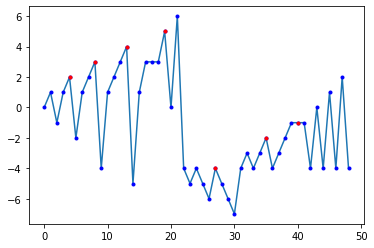

In [31]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
signal=[0,1,-1,1,2,-2,1,2,3,-4,1,2,3,4,-5,1,3,3,3,5,0,6,-4,-5,-4,-5,-6,-4,-5,-6,-7,-4,-3,-4,-3,-2,-4,-3,-2,-1,-1,-1,-4,0,-4,1,-4,2,-4]
signal=np.array(signal)
peaks, properties = find_peaks(signal,width=1.5)
plt.plot(signal)
plt.plot(signal,'b.')
plt.plot(np.arange(len(signal))[peaks],signal[peaks],'r.')
plt.show()

[1.5        2.75       3.71428571 4.88888889 5.16666667 9.
 2.         3.         2.         3.         6.         2.
 2.         2.        ]


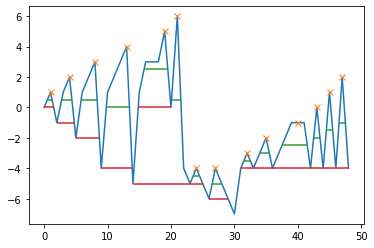

In [27]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
signal=[0,1,-1,1,2,-2,1,2,3,-4,1,2,3,4,-5,1,3,3,3,5,0,6,-4,-5,-4,-5,-6,-4,-5,-6,-7,-4,-3,-4,-3,-2,-4,-3,-2,-1,-1,-1,-4,0,-4,1,-4,2,-4]
x=np.array(signal)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_full = peak_widths(x, peaks, rel_height=1)
print(results_full[0])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()

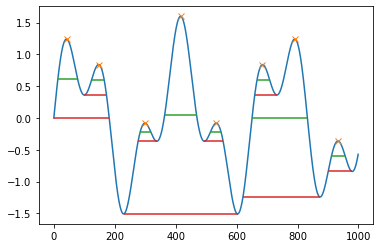

In [24]:
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_full = peak_widths(x, peaks, rel_height=1)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()

## 动态显示peak结果

In [ ]:
class MoAnimation():
    def __init__(self,fig,ax,interval,rect_locs,frame=-1):
        self.rect_locs=rect_locs
        self.span=plt.Rectangle((rect_locs[0][0],rect_locs[1][0]), rect_locs[2][0],rect_locs[3][0], color='orange', alpha=0.3)  # 左下起点，长，宽，颜色，α#plt.axvspan(xmin=0,xmax=10)#
        ax.add_patch(self.span)
        if frame<0:
            frame=np.arange(len(self.rect_locs[0]))
        self.anima=FuncAnimation(fig, self.update, frames=frame, interval=interval)
    def update(self,i):
        self.span.set_bounds([self.rect_locs[0][i], self.rect_locs[1][i],self.rect_locs[2][i],self.rect_locs[3][i]])
        #self.span.set_xy([5+i, 6+i])
        '''self.span.set_width(self.x[i][-1]-self.x[i][0])
        self.span.set_height(np.ptp(self.y[i]))'''
        return self.span
    def save(self,save_path):
        self.anima.save(save_path, writer='pillow')

def show_peaks_animation(curve,prominence=0,fig_size=(5,3),save_path:str=None):
    properties = find_peaks(curve,prominence=prominence)
    botom=np.minimum(curve[properties[1]['left_bases']],curve[properties[1]['right_bases']])
    height=curve[properties[0]]-botom
    width=properties[1]['right_bases']-properties[1]['left_bases']
    data=(properties[1]['left_bases'],botom,width,height)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111)
    ax.plot(curve)
    ani=MoAnimation(fig,ax,500,data)
    if save_path is not None:
        ani.save(save_path)
    plt.show()


x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
show_peaks_animation(x)

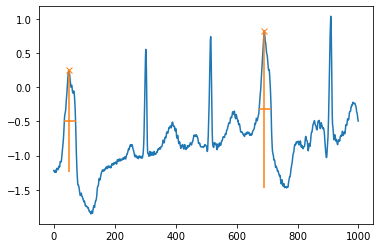

In [23]:

import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
 
#要仅选择非典型心跳，我们将两个条件结合起来：最小突出1和至少20个样本的宽度。
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
 
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
          xmax=properties["right_ips"], color = "C1")
plt.show()

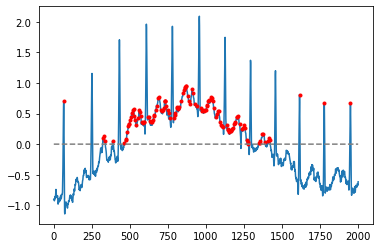

In [31]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=[0,1])
plt.plot(x)
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

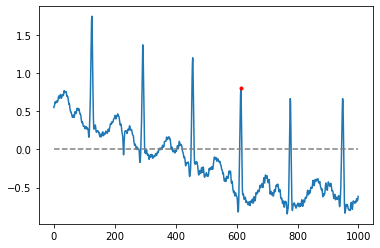

In [64]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[3000:4000]
peaks, _ = find_peaks(x, prominence=1.6)
plt.plot(x)
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

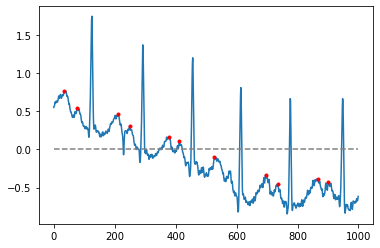

In [68]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[3000:4000]
peaks, _ = find_peaks(x, width=10)
plt.plot(x)
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

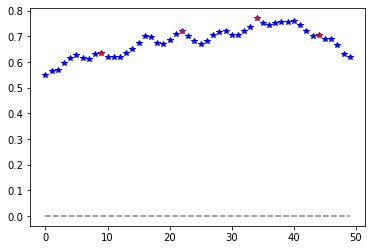

In [94]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[3000:3050]
peaks, _ = find_peaks(x, distance=10)
plt.plot(x,'b*')
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

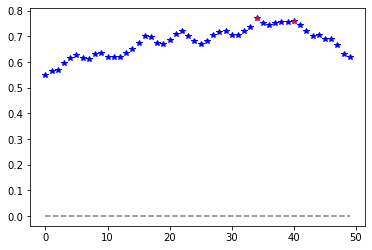

In [96]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[3000:3050]
peaks, _ = find_peaks(x, width=3)
plt.plot(x,'b*')
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

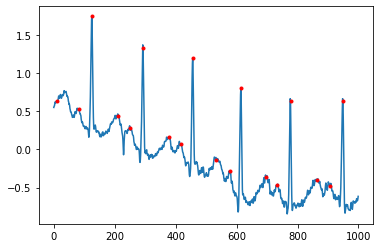

In [120]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks,ricker
'''x = electrocardiogram()[3000:4000]
peaks, _ = find_peaks(x, width=10)
plt.plot(x)
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()'''

data=electrocardiogram()[3000:4000]#np.arange(0, np.pi*7, 0.05)
xs=np.arange(len(data))
peakind = signal.find_peaks_cwt(data, widths=np.arange(1,50),wavelet=ricker)

plt.plot(xs,data)
plt.plot(xs[peakind], data[peakind], "r.")

plt.show()


In [157]:
def j(c,a=4,b=3):
    print(a,b,c)
    
def h(c,dic={}):
    j(c,**dic)
h(5)




4 3 5


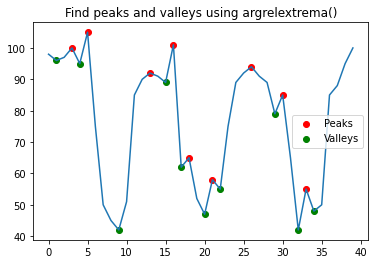

In [14]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

data_x = np.arange(start = 0, stop = 40, step = 1, dtype='int')
data_y = np.array([98,96,97,100,95,105,75,50,45,42,
                   51,85,90,92,91,89,101,62,65,52,
                   47,58,55,75,89,92,94,91,89,79,
                   85,65,42,55,48,50,85,88,95,100])

# Find peaks
# order:两侧使用多少点进行比较
peak_indexes = signal.argrelextrema(data_y, np.greater, order=1)
peak_indexes = peak_indexes[0]

# Find valleys
# order:两侧使用多少点进行比较
valley_indexes = signal.argrelextrema(data_y, np.less, order=1)
valley_indexes = valley_indexes[0]

(fig, ax) = plt.subplots()

# Plot all data
ax.plot(data_x, data_y)

# Plot peaks
peak_x = peak_indexes
peak_y = data_y[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='red', label="Peaks")

# Plot valleys
valley_x = valley_indexes
valley_y = data_y[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='green', label="Valleys")

# 添加标题
plt.title('Find peaks and valleys using argrelextrema()')
# 添加图例
plt.legend(loc='best')
# 保存图像
plt.savefig('peaks-valleys.png')
# 显示图像
plt.show()


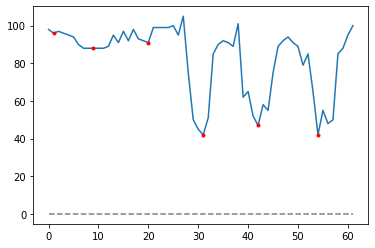

In [134]:
x = np.array([98,96,97,96,95,94,90,88,88,88,88,88,89,95,91,97,92,98,93,92,91,99,99,99,99,100,95,105,75,50,45,42,
                   51,85,90,92,91,89,101,62,65,52,
                   47,58,55,75,89,92,94,91,89,79,
                   85,65,42,55,48,50,85,88,95,100])
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
peaks, _ = find_peaks(x*-1, distance=6)
plt.plot(x)
plt.plot(peaks, x[peaks], "r.")
plt.plot(np.zeros_like(x), "--", color="gray")


plt.show()

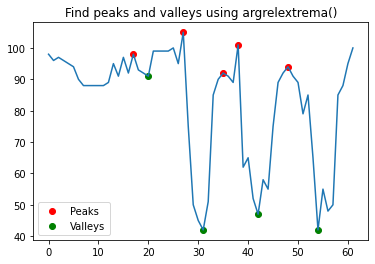

In [127]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


data_y = np.array([98,96,97,96,95,94,90,88,88,88,88,88,89,95,91,97,92,98,93,92,91,99,99,99,99,100,95,105,75,50,45,42,
                   51,85,90,92,91,89,101,62,65,52,
                   47,58,55,75,89,92,94,91,89,79,
                   85,65,42,55,48,50,85,88,95,100])
data_x = np.arange(len(data_y))
# Find peaks
# order:两侧使用多少点进行比较
peak_indexes = signal.argrelextrema(data_y, np.greater, order=2)
peak_indexes = peak_indexes[0]

# Find valleys
# order:两侧使用多少点进行比较
valley_indexes = signal.argrelextrema(data_y, np.less, order=2)
valley_indexes = valley_indexes[0]

(fig, ax) = plt.subplots()

# Plot all data
ax.plot(data_x, data_y)

# Plot peaks
peak_x = peak_indexes
peak_y = data_y[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='red', label="Peaks")

# Plot valleys
valley_x = valley_indexes
valley_y = data_y[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='green', label="Valleys")

# 添加标题
plt.title('Find peaks and valleys using argrelextrema()')
# 添加图例
plt.legend(loc='best')
# 保存图像
plt.savefig('peaks-valleys.png')
# 显示图像
plt.show()


## solving area

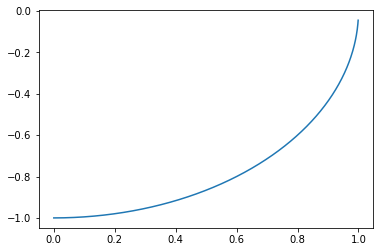

-0.7853665116388507
-0.7853680535759097
0.7630337778216472
0.7853981633974483


In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,1,0.001)
y =- np.sqrt(1-x**2)
#plt.close('all')
plt.plot(x, y)
plt.show()
print(np.trapz(y,x, dx=0.01))


from scipy.integrate import simps
print(simps(y,x, dx=0.01))

def polyarea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

print(polyarea(np.append(x, 0), np.append(y, 0)))

print(np.pi/4)

## 拐点

##### x：待检测数据对应的横轴数据序列，如我们案例中"前10日加好友的数量"
##### y：待检测数据序列，在x条件下对应的值，如我们案例中的条件概率
##### S：float型，默认为1，敏感度参数，越小对应拐点被检测出得越快，一般应用默认值就可以了
##### curve：str型，指明曲线之上区域是凸集还是凹集，concave代表凹，convex代表凸
##### direction：str型，指明曲线初始趋势是增还是减，increasing表示增，decreasing表示减

11


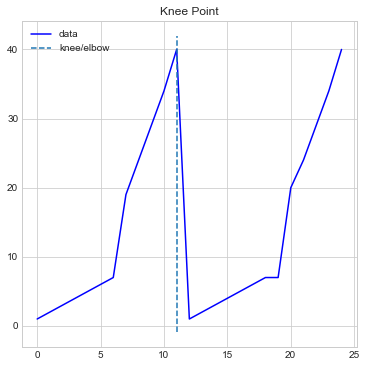

In [10]:
import numpy as np
from kneed import KneeLocator  ##寻求拐点位置的函数
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

s=[1,2,3,4,5,6,7,19,24,29,34,40,1,2,3,4,5,6,7,7,20,24,29,34,40]#,34,29,24,19,16,13,5,4,3,2,1]
#plt.plot(s)
x=np.arange(len(s))
magic=KneeLocator(x,s,curve='convex',direction='increasing',online=True)
print(magic.elbow) ##看肘部的点是哪一个点)
magic.plot_knee()

6


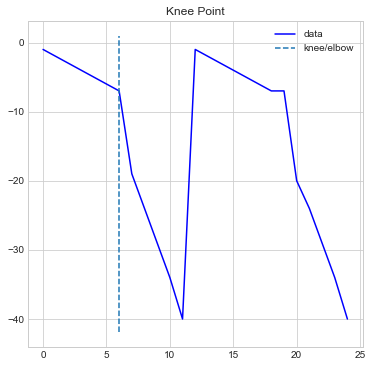

In [20]:
import numpy as np
from kneed import KneeLocator  ##寻求拐点位置的函数
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

s=[1,2,3,4,5,6,7,19,24,29,34,40,1,2,3,4,5,6,7,7,20,24,29,34,40]#,34,29,24,19,16,13,5,4,3,2,1]
s=np.array(s)*-1
#plt.plot(s)
x=np.arange(len(s))
magic=KneeLocator(x,s,curve='concave',direction='decreasing',online=True)
print(magic.elbow) ##看肘部的点是哪一个点)
magic.plot_knee()

### 求导数

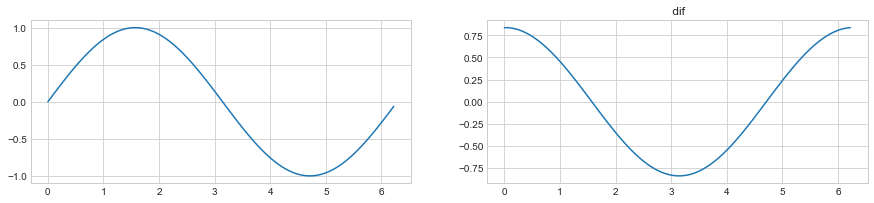

In [21]:
import numpy as np
from scipy.interpolate import interp1d#插值
from scipy.misc import derivative#求导
def dif_curve(X,Y,n=1):
    return [derivative(func=interp1d(X, Y, kind="cubic",fill_value="extrapolate"),  # 'linear','zero', 'slinear', 'quadratic', 'cubic',  4, 5,
            x0=x,n=n) for x in X]
fig = plt.figure(figsize=(15,3))
x=np.arange(100)/100*np.pi*2
y=np.sin(x)
ax = fig.add_subplot(1,2,1)
plt.plot(x,y)
ax = fig.add_subplot(1,2,2)
plt.plot(x,dif_curve(x,y))
plt.title(' dif')
plt.show()

## 包络线

### ①

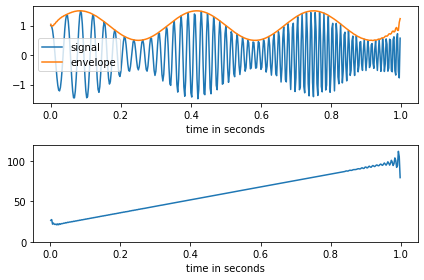

In [3]:
#在本例中，我们使用希尔伯特变换来确定amplitude-modulated 信号的幅度包络和瞬时频率。
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
#我们创建一个频率从 20 Hz 增加到 100 Hz 的啁啾，并应用幅度调制。

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
#幅度包络由分析信号的幅度给出。瞬时频率可以通过瞬时相位对时间的微分获得。瞬时相位对应于解析信号的相位角。

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()

### ②

In [ ]:
import math
import numpy as np
from numpy import array, sign, zeros
from scipy.interpolate import interp1d
import scipy.signal

#输入信号序列即可(list)
def envelope_extraction(signal):
    s = signal.astype(float )
    q_u = np.zeros(s.shape)
    q_l =  np.zeros(s.shape)

    #在插值值前加上第一个值。这将强制模型对上包络和下包络模型使用相同的起点。
    #Prepend the first value of (s) to the interpolating values. This forces the model to use the same starting point for both the upper and lower envelope models.
    u_x = [0,] #上包络的x序列
    u_y = [s[0],] #上包络的y序列

    l_x = [0,] #下包络的x序列
    l_y = [s[0],] #下包络的y序列

    # 检测波峰和波谷，并分别标记它们在u_x,u_y,l_x,l_中的位置。 
    #Detect peaks and troughs and mark their location in u_x,u_y,l_x,l_y respectively.

    for k in range(1,len(s)-1):
        if (sign(s[k]-s[k-1])==1) and (sign(s[k]-s[k+1])==1):
            u_x.append(k)
            u_y.append(s[k])

        if (sign(s[k]-s[k-1])==-1) and ((sign(s[k]-s[k+1]))==-1):
            l_x.append(k)
            l_y.append(s[k])

    u_x.append(len(s)-1) #上包络与原始数据切点x
    u_y.append(s[-1]) #对应的值

    l_x.append(len(s)-1) #下包络与原始数据切点x
    l_y.append(s[-1]) #对应的值

    #u_x,l_y是不连续的，以下代码把包络转为和输入数据相同大小的数组[便于后续处理，如滤波]
    upper_envelope_y = np.zeros(len(signal))
    lower_envelope_y = np.zeros(len(signal))

    upper_envelope_y[0] = u_y[0]#边界值处理
    upper_envelope_y[-1] = u_y[-1]
    lower_envelope_y[0] =  l_y[0]#边界值处理
    lower_envelope_y[-1] =  l_y[-1]
    
    #上包络
    last_idx,next_idx = 0, 0
    k, b = general_equation(u_x[0], u_y[0], u_x[1], u_y[1]) #初始的k,b
    for e in range(1, len(upper_envelope_y)-1):

        if e not in u_x:
            v = k * e + b
            upper_envelope_y[e] = v
        else:
            idx = u_x.index(e)
            upper_envelope_y[e] = u_y[idx]
            last_idx = u_x.index(e)
            next_idx = u_x.index(e) + 1
            #求连续两个点之间的直线方程
            k, b = general_equation(u_x[last_idx], u_y[last_idx], u_x[next_idx], u_y[next_idx])        
    
    #下包络
    last_idx,next_idx = 0, 0
    k, b = general_equation(l_x[0], l_y[0], l_x[1], l_y[1]) #初始的k,b
    for e in range(1, len(lower_envelope_y)-1):

        if e not in l_x:
            v = k * e + b
            lower_envelope_y[e] = v
        else:
            idx = l_x.index(e)
            lower_envelope_y[e] = l_y[idx]
            last_idx = l_x.index(e)
            next_idx = l_x.index(e) + 1
            #求连续两个切点之间的直线方程
            k, b = general_equation(l_x[last_idx], l_y[last_idx], l_x[next_idx], l_y[next_idx])     
    
    #也可以使用三次样条进行拟合
    #u_p = interp1d(u_x,u_y, kind = 'cubic',bounds_error = False, fill_value=0.0)
    #l_p = interp1d(l_x,l_y, kind = 'cubic',bounds_error = False, fill_value=0.0)
    #for k in range(0,len(s)):
     #   q_u[k] = u_p(k)
     #   q_l[k] = l_p(k)

    return upper_envelope_y, lower_envelope_y

def general_equation(first_x,first_y,second_x,second_y):
    # 斜截式 y = kx + b 
    A = second_y-first_y
    B = first_x-second_x
    C = second_x * first_y - first_x * second_y
    k = -1 * A / B
    b = -1 * C / B
    return k, b